[문제173] emp1.csv 데이터를 이용해서 급여를 많이 받는 순으로 10위까지 구하세요.
```python
import pandas as pd
emp = pd.read_csv('C:/Users/Rainy/Documents/git/DA_Academy\emp1.csv', 
                  names=['empid', 'lname','hiredate','salary','deptid'])
# sort_values
emp.sort_values('salary', ascending=False)[:10]

# rank
emp[emp.salary.rank(ascending=False, method='first') <= 10].sort_values(ascending=False, by='salary')
```

[문제174] emp1.csv 데이터를 이용해서 부서별로 급여를 많이 받는 순으로 5위까지 구하세요.
```python
import pandas as pd
emp = pd.read_csv('C:/Users/Rainy/Documents/git/DA_Academy\emp1.csv', 
                  names=['empid', 'lname','hiredate','salary','deptid'])
emp[emp.salary.groupby(emp.deptid).rank(ascending=False) <= 5].sort_values(ascending=[True, False], by=['deptid','salary'])
```

[문제175] yob2016.txt 데이터를 이용해서 아기 이름 순위 10위까지 구하세요.
```python
import pandas as pd
yob = pd.read_csv('C:/Users/Rainy/Documents/git/DA_Academy\yob2016.txt', 
                  names=['name','gender','num'])
# sort_values
yob.sort_values(by='num', ascending=False)[:10]

# rank
yob[yob.num.rank(ascending=False, method='first') <= 10].sort_values(by='num', ascending=False)
```

[문제176] yob2016.txt 데이터를 이용해서 성별 아기 이름 순위 5위까지 구하세요.
```python
import pandas as pd
yob = pd.read_csv('C:/Users/Rainy/Documents/git/DA_Academy\yob2016.txt', 
                  names=['name','gender','num'])

yob[yob.num.groupby(yob.gender).rank(ascending=False, method='first') <= 5].sort_values(by=['gender', 'num'], ascending=False)
```

[문제177] 2000 ~ 2016년도 년도별 출생수
```
https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data
2000 3777666
2001 3741011
2002 3735651
2003 3799547
2004 3817903
2005 3841440
2006 3952231
2007 3993206
2008 3925486
2009 3814539
2010 3689517
2011 3650434
2012 3648441
2013 3634744
2014 3692930
2015 3683749
2016 3637321 
```
```python
# pandas 
import pandas as pd

for i in range(17):
    year = 2000+i
    file = 'C:/Users/stu/git/DA_Academy/yob{}.txt'.format(year)
    yob = pd.read_csv(file, names=['name', 'gender','num'])
    print(year, yob.num.sum())

# pandas 없이
for i in range(17):
    year = 2000+i
    file = 'C:/Users/stu/git/DA_Academy/yob{}.txt'.format(year)
    total = 0
    with open(file, 'r') as yob:
        for line in yob:
            data = line.split(',')
            total += int(data[2])
        print(year, total)
```
```python
# 선생님 답
import os
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

year_cn=[]
all_data = pd.DataFrame()
for y in range(2000,2017):
    filename='c:\yob\yob%d.txt'%y
    name = os.path.basename(filename)
    name = name.split('.')[0]
    df = pd.read_csv(filename, names=['name','gender','birth'])
    all_data = all_data.append(df)
    year_cn.append((name[3:],all_data['birth'].sum()))
    print(name[3:],all_data['birth'].sum())
```

[문제178]  2000 ~ 2016년도 년도별 출생수 결과를 year.txt 파일에 저장하세요.
```python
import pandas as pd

for i in range(17):
    year = 2000+i
    file = 'C:/Users/stu/git/DA_Academy/yob{}.txt'.format(year)
    yob = pd.read_csv(file, names=['name', 'gender','num'])
    with open('C:/Users/stu/git/DA_Academy/year.txt', 'a+') as file:
        file.write(str(year)+','+str(yob.num.sum())+'\n')
```        
```python
# 선생님 답
import os
import glob
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## for 문 활용
year_cn=[]
all_data = pd.DataFrame()
for f in glob.glob("c:\data\yob*.txt"):
    name = os.path.basename(f) # 파일이름 확장자 뽑기
    name = name.split('.')[0] # yob#### 저장
    df = pd.read_csv(f, names=['name','gender','birth'])
    print(name[3:],df['birth'].sum())

with open('c:\python_data\year.txt','w') as f:
    for year, birth in year_cn:
        data = '%s,%s\n'%(year,birth)
        print(data)
        f.write(data) # 값을 하나하나 만들어야함

## csv 패키지 활용        
import os
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import csv

with open('c:/python_data/year_total.csv','w') as f:
    writer = csv.writer(f, delimiter=',') # csv형식으로 만들 것이고 구분자는 ',' 로 구분하겠다. 
    for y in range(2000,2017):
        filename='c:/python_data/yob%d.txt'%y
        name = os.path.basename(filename)
        name = name.split('.')[0]
        df = pd.read_csv(filename, names=['name','gender','birth'])
        writer.writerow([name[3:],df['birth'].sum()]) 
```

[문제179] 2010 ~ 2016  년도까지 성별 출생 현황을
year_gender_total.csv 파일로 생성해주세요.
```python
import pandas as pd

for i in range(17):
    year = 2000+i
    file = 'C:/Users/stu/git/DA_Academy/yob{}.txt'.format(year)
    yob = pd.read_csv(file, names=['name', 'gender','num'])
    with open('C:/Users/stu/git/DA_Academy/year_gender_total.csv', 'a+') as file:
        file.write('{},F,{}\n'.format(year, yob[yob.gender=='F'].num.sum()))
        file.write('{},M,{}\n'.format(year, yob[yob.gender=='M'].num.sum()))
```     
```python
# 선생님 답
with open('c:/data/year_gender_total.csv','w',encoding='utf-8') as f: # 파일 에러가 뜰 경우 encoding 옵션에 값의 맞게 옵션값을 넣으면 실행된다.
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['년도','여자','남자'])
    for y in range(2000,2017):
        filename='c:\data\yob%d.txt'%y
        name = os.path.basename(filename)
        name = name.split('.')[0]
        df = pd.read_csv(filename, names=['name','gender','birth'])
        gender_cn = df['birth'].groupby(df['gender']).sum()
        f_cn = gender_cn.loc['F']
        m_cn = gender_cn.loc['M']
        writer.writerow([name[3:],f_cn, m_cn])

b=pd.read_csv('c:/data/year_gender_total.csv')
```

[문제180] 2010 ~ 2016  년도까지 성별 출생 현황을 그래프를 그리세요.

```python
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

file = pd.read_csv('C:/Users/stu/git/DA_Academy/year_gender_total.csv', names=['year','gender', 'num'])
file = file.set_index('year')
plt.plot(file[file.gender=='F'].num, label='여성')
plt.plot(file[file.gender=='M'].num, label='남성')
plt.grid()
plt.title('연도별 남녀 출생',fontsize=15)

plt.xlabel('년도',fontsize=10)
plt.ylabel('출생수',fontsize=10)
plt.legend()
```

```python
# 선생님 답
import csv
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
%matplotlib inline

with open('c:/python_data/year_gender_total.csv','w',encoding="utf-8") as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['년도','여자','남자'])
    for y in range(2000,2017):
        filename='c:\python_data\yob%d.txt'%y
        name = os.path.basename(filename)
        name = name.split('.')[0]
        df = pd.read_csv(filename, names=['name','gender','birth'])
        gender_cn = df['birth'].groupby(df['gender']).sum()
        writer.writerow([name[3:],gender_cn.loc['F'],gender_cn.loc['M']])
      
df = pd.read_csv('c:/python_data/year_gender_total.csv')
df = df.set_index("년도")

df.plot()
df.plot(kind="bar")
df.plot(kind="barh")

plt.plot(df.ix[:,0], label="여자", color="r", linestyle="--")
plt.plot(df.ix[:,1], label="남자", color="b", linestyle=":")
plt.title("성별 출생 현황", fontsize=15)
plt.xlabel("년도",fontsize=10)
plt.ylabel("출생수",fontsize=10)
plt.legend()
plt.grid()
```

## matplotlib
-  시각화 관련 함수를 제공하는 패키지
-  %matplotlib inline: 주피터 노트북에서 노트북 내부에 그림을 표시하도록 하는 magic command
-  ## pylab
    -  matlab의 시각화 명령을 거의 그대로 사용할 수 있도록 matplotlib의 하위 api를 wrapping 한 서브패키지
    
-  ### plot()
    -  표를 그리는 함수
    -  `plt.plot(*x축값, y축값, *스타일)` * 생략가능
        -  x축값은 생략시 0부터 1씩늘어나는 간격으로 설정
        -  하나의 plot에 여러 데이터를 넣거나, 여러 plot을 하나에 겹쳐 그릴 수도 있다. 
        -  하나의 plot에 여러 데이터를 넣을 때는 모든 인자를 모두 명시해야 한다.
    -  스타일(약어)
        -  color(c) = 색
            -  blue(b)
            -  green(g)
            -  red(r)
            -  cyan(c)
            -  magenta(m)
            -  yellow(y)
            -  black(k)
            -  white(w)
            -  0~1 *gray
        -  marker = 마커종류
            -  . : point marker
            -  , : pixel marker
            -  o : circle marker
            -  v : triangle_down marker
            -  ^ : triangle_up marker
            -  < : triangle_left marker
            -  \> : triangle_right marker
            -  s : square marker
            -  p : pentagon marker
            -  \* : star marker
            -  \+ : plus marker
            -  x : x marker
            -  D : diamond marker
            -  d : thin_diamond marker
        -  markersize(ms) = 마커크기
        -  markeredgecolor = 마커선색
        -  markeredgewidth = 마커선굵기
        -  markerfacecolor = 마커내부색
        -  linewidth(lw) = 선굵기
        -  linestyle(ls) = 선종류
            -  \- : solid line style
            -  -- : dashed line style
            -  -. : dash-dot line style
            -  : : dotted line style
            
-  ### show()
    -  시각화 명령을 실제 차트로 렌더링
    -  마지막 플롯 명령으로부터 반환된 플롯 객체의 표현을 가려줌
    -  `plt.show()`

-  ### xlim()
    -  x축의 최대, 최소값 지정
    -  `plt.xlim(최소값, 최대값)`

-  ### ylim()
    -  y축의 최대, 최소값 지정
    -  `plt.ylim(최소값, 최대값)`

-  ### xticks()
    -  x축상의 위치 표시지점 지정
    -  `plt.xticks(위치)`

-  ### yticks()
    -  y축상의 위치 표시지점 지정
    -  `plt.yticks(위치)`
    
-  ### grid()
    -  표에 격자를 출력
    -  `plt.grid(그리드사용여부)`

-  ### title()
    -  표의 제목 지정
    -  `plt.title(제목)`

-  ### xlabel()
    -  x축 이름 지정
    -  `plt.xlabel(이름)`
    
-  ### ylabel()
    -  y축 이름 지정
    -  `plt.ylabel(이름)`
    
-  ### legend()    
    -  범례 지정
    -  `plt.legend(*loc = 위치)` * 생략가능
        -  위치(약어)
            -  best(0)
            -  upper right(1)
            -  upper left(2)
            -  lower left(3)
            -  lower right(4)
            -  right(5)
            -  center left(6)
            -  center right(7)
            -  lower center(8)
            -  upper center(9)
            -  center (10)

<function matplotlib.pyplot.show(*args, **kw)>

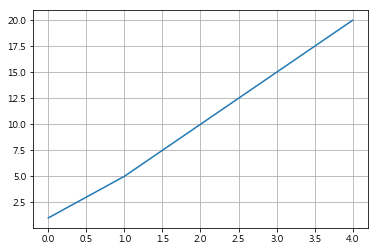

In [20]:
import matplotlib as mpl
import matplotlib.pylab as plt
plt.plot([1,5,10,15,20])
plt.grid(True) # 바탕 grid
plt.show # web에서 출력이 되지 않을땐 show를 해야한다.

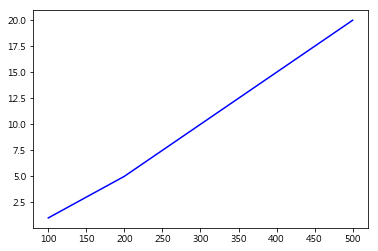

In [21]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],color='blue')

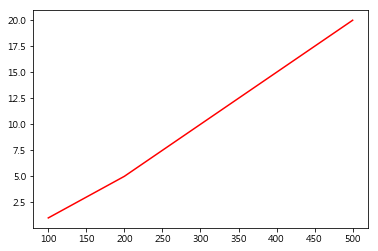

In [22]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],color='r')

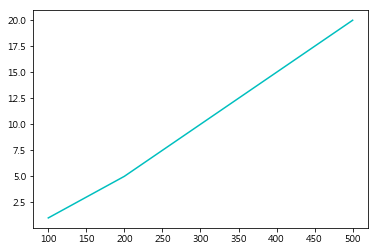

In [23]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],color='c') #rgbcmyk

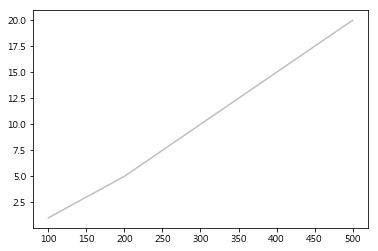

In [24]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],color='0.75') #0~1 회색 조

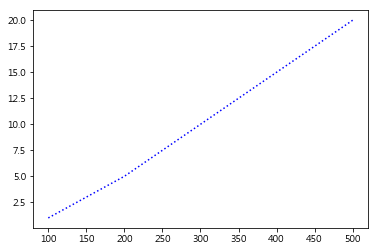

In [25]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],color='blue',linestyle='dotted') 

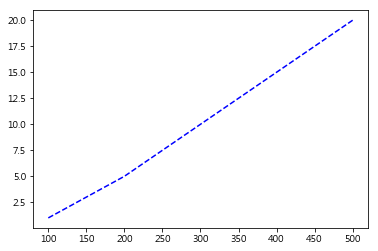

In [26]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],color='blue',linestyle='dashed')  # solid, dashed, dashdot

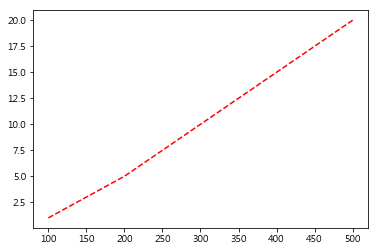

In [27]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],'--r') # dashed 와 같다. 색깔도 표현하는 것이 가능하다.

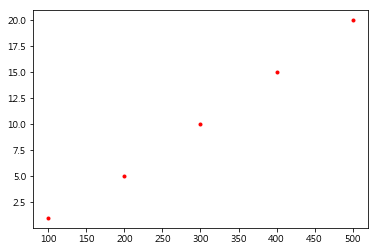

In [28]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],'.r') #dotted red

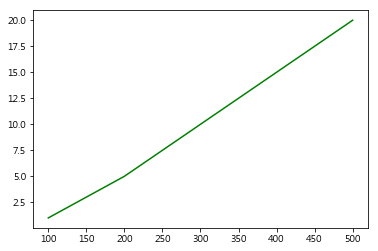

In [29]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],'-g') #solid green

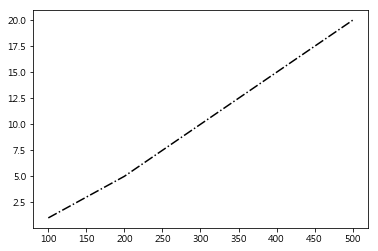

In [30]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],'-.k') # dashed black

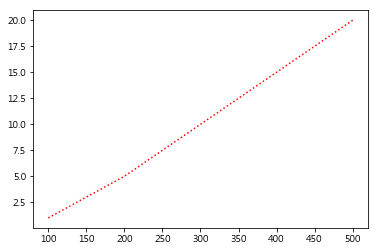

In [31]:
plt.plot([100,200,300,400,500],[1,5,10,15,20],':r') # dotted red

# 100m 달리기 (가정)
```python
import pandas as pd
from pandas import DataFrame, Series
data={'홍길동':[15,13,11],'윤건':[13,14,15],'나얼':[10,9,12]}
data
df=DataFrame(data,index=['2015','2016','2017'])
df.rank() # 낮은 값이 1위로 간다. 
```
```
나얼	윤건	홍길동
2015	2.0	1.0	3.0
2016	1.0	2.0	2.0
2017	3.0	3.0	1.0
```

In [33]:
import pandas as pd
from pandas import DataFrame, Series
data={'홍길동':[15,13,11],'윤건':[13,14,15],'나얼':[10,9,12]}
data
df=DataFrame(data,index=['2015','2016','2017'])
df.rank() # 낮은 값이 1위로 간다. 

,홍길동,윤건,나얼
2015,3.0,1.0,2.0
2016,2.0,2.0,1.0
2017,1.0,3.0,3.0


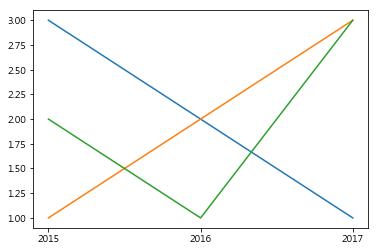

In [34]:
x=df.rank()
plt.plot(x)

C:\Users\stu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\stu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\stu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


([<matplotlib.axis.XTick at 0xbb0a470>,
 <a list of 3 Text xticklabel objects>)

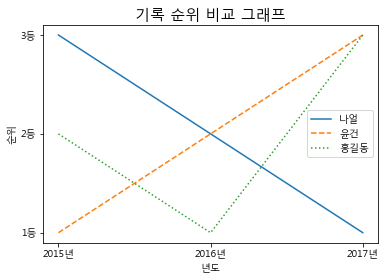

In [37]:
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)

plt.plot(x.ix[:,0],label='나얼') # 범례 만들기
plt.plot(x.ix[:,1],label='윤건',linestyle='--')
plt.plot(x.ix[:,2],label='홍길동',linestyle=':')

plt.title('기록 순위 비교 그래프',fontsize=15)

plt.xlabel('년도',fontsize=10)
plt.ylabel('순위',fontsize=10)

plt.legend() # 범례출력

#plt.ylim([1,2,3])
plt.yticks([1,2,3],['1등','2등','3등']) # 기존의 레벨을 다른 형식으로 변화
plt.xticks(['2015','2016','2017'],['2015년','2016년','2017년'])

## pandas
-  ### plot()
    -  pandas 에서 matplotlib을 내부적으로 import 하여 제공하는 시각화 함수
    -  `데이터프레임.plot(*kind=표종류, *stacked = 누적여부)` *생략가능
        -  표 종류
            -  bar: 막대그래프
            -  barh: 수평막대그래프
            -  pie: 파이차트
            -  hist: 히스토그램
            -  kde: Kernel Density Plot
            -  box: boxplot

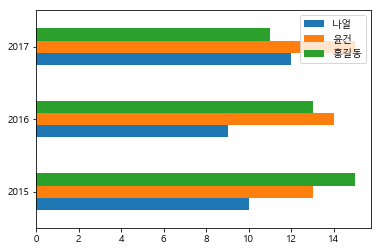

In [99]:
# 수평막대 그래프
df.plot(kind='barh')

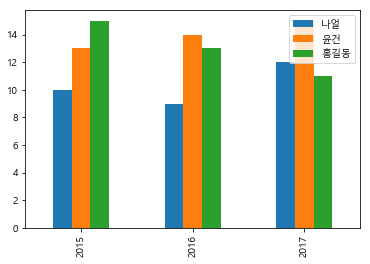

In [100]:
# 수직막대 그래프
df.plot(kind='bar')

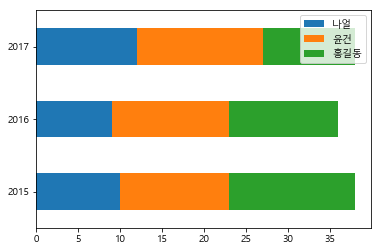

In [101]:
# 스택형 막대그래프
df.plot(kind='barh',stacked=True)

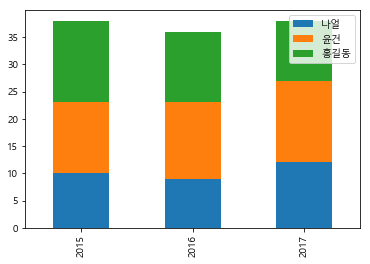

In [102]:
df.plot(kind='bar',stacked=True)

In [15]:
# 연도별 출생현황
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pylab as plt

t=[]

for i in range(2000,2017):
    filename='C:/Users/stu/git/DA_Academy/yob%d.txt' %i
    yob=pd.read_csv(filename,names=['name','gender','count'])
    total=yob['count'].groupby(yob['gender']).sum()
    f_cn=total.loc['F']
    m_cn=total.loc['M']
    t.append([i,f_cn,m_cn])
    
T=DataFrame(t,columns=['년도','여','남'])
T.index=T['년도'] # 인덱스에 년도로 놓아야 한번에 뽑아내는것이 가능하다.
del T['년도']

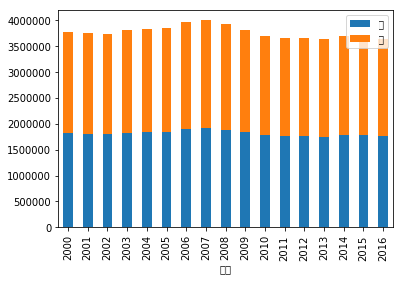

In [16]:
T.plot(kind='bar',stacked=True)

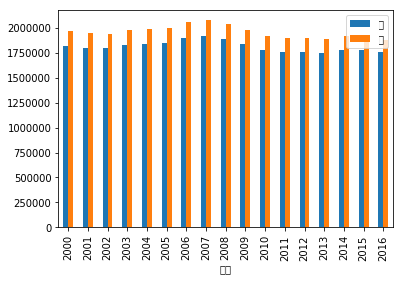

In [17]:
T.plot(kind='bar')

C:\Users\stu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\stu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


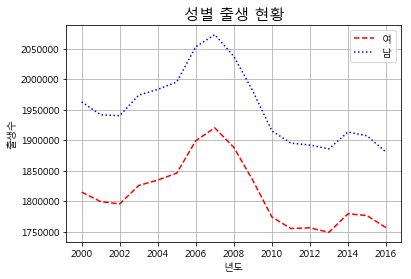

In [38]:
# 선그래프로 보기
plt.plot(T.ix[:,0], label="여", color="r", linestyle="--")
plt.plot(T.ix[:,1], label="남", color="b", linestyle=":")
plt.title("성별 출생 현황", fontsize=15)
plt.xlabel("년도",fontsize=10)
plt.ylabel("출생수",fontsize=10)
plt.legend()
plt.grid()